# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | tamluk
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | grand-bourg
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | mungwi
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | barra do bugres
Processing Record 12 of Set 1 | santa terezinha
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | kailua-kona
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | inirida
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | kenai
Processing Record 22 of Set 1 | grytviken
Processi

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

if city_data_df['Max Temp'].mean() > 200:
    city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,27.36,25,0,4.71,RU,1722412225
1,tamluk,22.3000,87.9167,34.33,58,100,3.54,IN,1722412226
2,ushuaia,-54.8000,-68.3000,2.81,56,0,3.09,AR,1722412228
3,yellowknife,62.4560,-114.3525,15.31,95,100,3.09,CA,1722412229
4,grand-bourg,15.8835,-61.3148,24.97,74,19,4.10,GP,1722412231


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,27.36,25,0,4.71,RU,1722412225
1,tamluk,22.3000,87.9167,34.33,58,100,3.54,IN,1722412226
2,ushuaia,-54.8000,-68.3000,2.81,56,0,3.09,AR,1722412228
3,yellowknife,62.4560,-114.3525,15.31,95,100,3.09,CA,1722412229
4,grand-bourg,15.8835,-61.3148,24.97,74,19,4.10,GP,1722412231


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

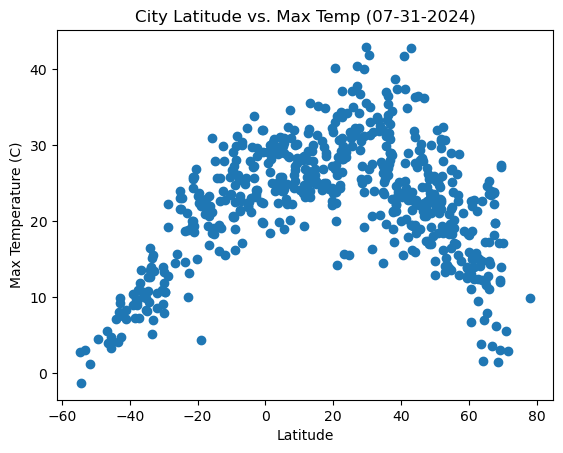

In [60]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(lat, max_temp)
plt.title('City Latitude vs. Max Temp (07-31-2024)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

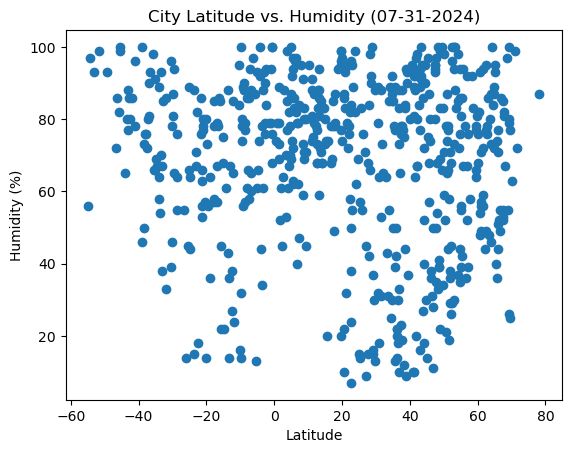

In [61]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
humid = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(lat, humid)
plt.title('City Latitude vs. Humidity (07-31-2024)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

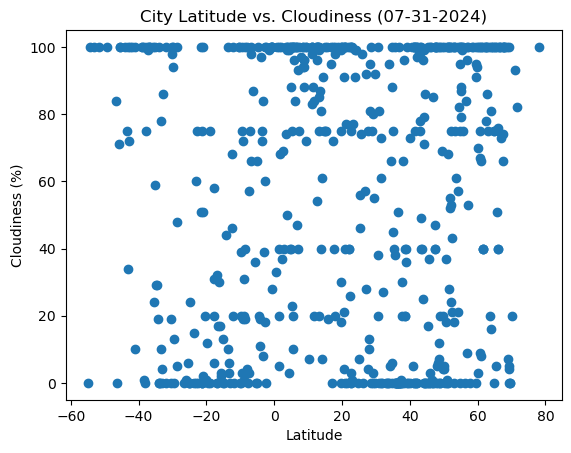

In [62]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cloud = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(lat, cloud)
plt.title('City Latitude vs. Cloudiness (07-31-2024)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

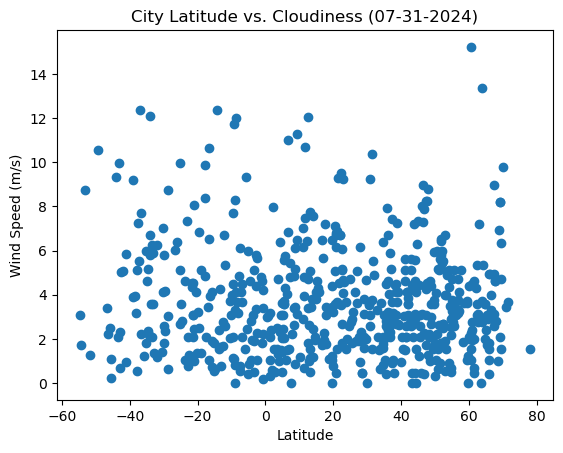

In [63]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(lat, wind)
plt.title('City Latitude vs. Cloudiness (07-31-2024)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
def regressor(x, y, hemi):
    if hemi == True:
        x_r = northern_hemi_df[x]
        y_r = northern_hemi_df[y]
    else:
        x_r = southern_hemi_df[x]
        y_r = southern_hemi_df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_r, y_r)
    regress_values = x_r * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'r-value = {abs(rvalue)}')
    plt.scatter(x_r, y_r)
    plt.plot(x_r,regress_values,"r-")
    plt.annotate(line_eq,(0,0),fontsize=15,color="red")
    if hemi == True:
        plt.title(f'Northern Hemisphere {x} vs. {y}')
    else:
        plt.title(f'Southern Hemisphere {x} vs. {y}')
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,27.36,25,0,4.71,RU,1722412225
1,tamluk,22.3000,87.9167,34.33,58,100,3.54,IN,1722412226
3,yellowknife,62.4560,-114.3525,15.31,95,100,3.09,CA,1722412229
4,grand-bourg,15.8835,-61.3148,24.97,74,19,4.10,GP,1722412231
8,sisimiut,66.9395,-53.6735,3.59,86,73,2.94,GL,1722412237


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,2.81,56,0,3.09,AR,1722412228
5,puerto ayora,-0.7393,-90.3518,19.75,100,100,2.24,EC,1722412130
6,lebu,-37.6167,-73.6500,10.90,72,100,7.24,CL,1722412234
7,mungwi,-10.1732,31.3694,23.56,16,0,3.10,ZM,1722412235
10,barra do bugres,-15.0725,-57.1811,18.34,68,0,0.54,BR,1722412240


###  Temperature vs. Latitude Linear Regression Plot

r-value = 0.5361586102490848


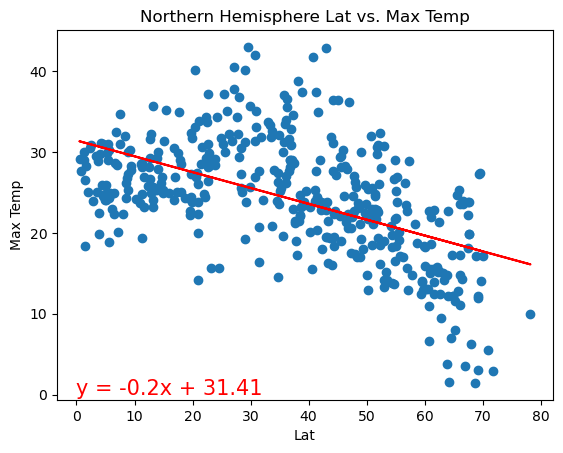

<Figure size 640x480 with 0 Axes>

In [105]:
# Linear regression on Northern Hemisphere
regressor('Lat', 'Max Temp', True)
plt.savefig("output_data/Fig5.png")

r-value = 0.8660458393389984


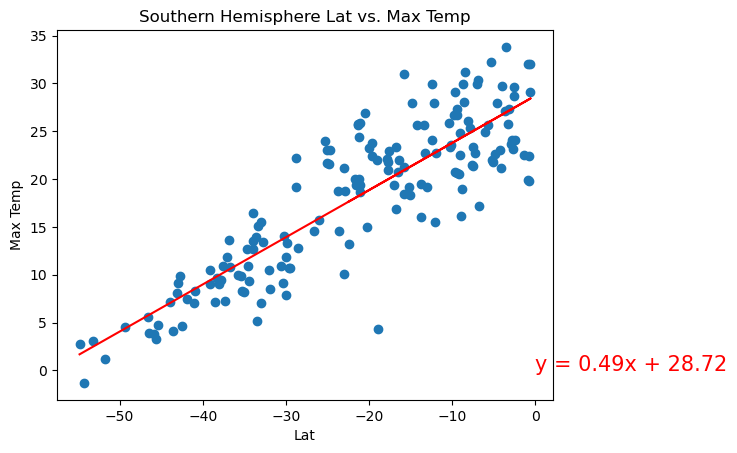

<Figure size 640x480 with 0 Axes>

In [106]:
# Linear regression on Southern Hemisphere
regressor('Lat', 'Max Temp', False)
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** There is a strong relationship between latitiude and temperature in the Southern Hemisphere, while there is a weaker linear relationship in the Northern Hemisphere. This could be becuase of abnormal variables such as increased forest fires or the tilt of the Earth during the Summer Season. Regardless, there is a clear pattern that cooler temperatures are found farther away from the equator in either direction. 

### Humidity vs. Latitude Linear Regression Plot

r-value = 0.0944141111285239


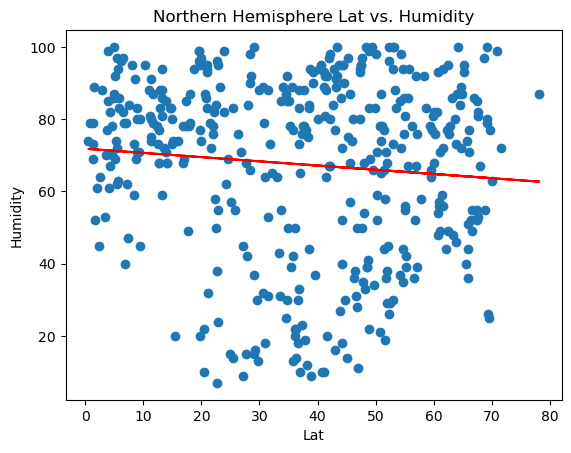

<Figure size 640x480 with 0 Axes>

In [111]:
# Northern Hemisphere
regressor('Lat', 'Humidity', True)
plt.savefig("output_data/Fig7.png")

r-value = 0.10971681837532149


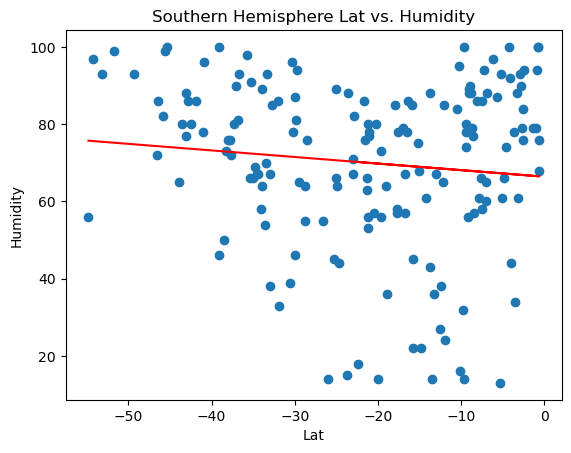

<Figure size 640x480 with 0 Axes>

In [109]:
# Southern Hemisphere
regressor('Lat', 'Humidity', False)
plt.savefig("output_data/Fig8.png")

**Discussion about the linear relationship:** There r value is very low, so their is no relationship between latitiude and humidity. By nature, humidity should be linked to temperature but differences in elevation, wind, and vegetation might remove any link between humidty and temperature, and by extension latitude.

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.07180752217288378


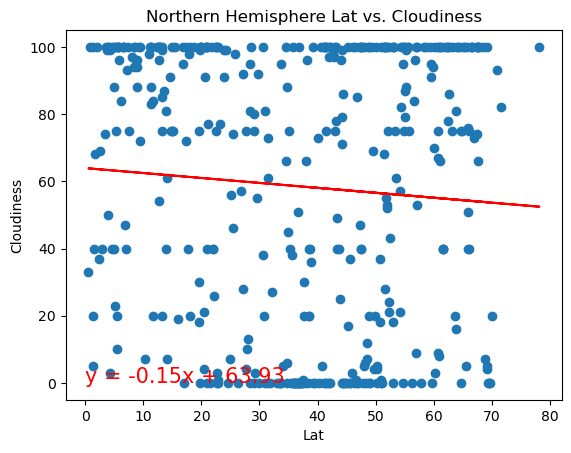

<Figure size 640x480 with 0 Axes>

In [110]:
# Northern Hemisphere
regressor('Lat', 'Cloudiness', True)
plt.savefig("output_data/Fig9.png")

r-value = 0.13916005285064867


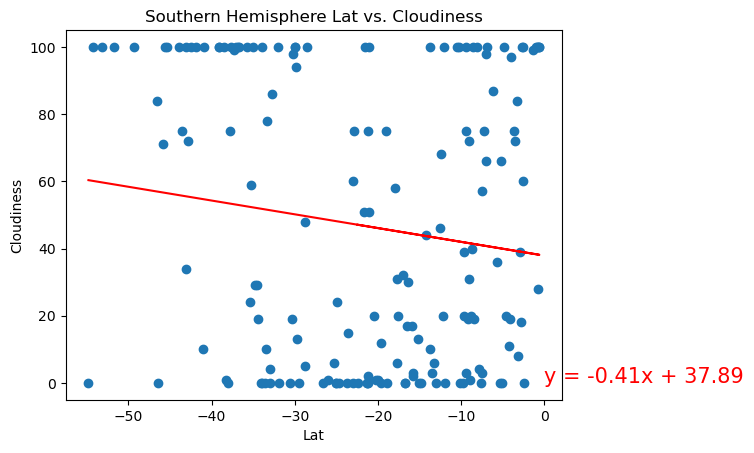

<Figure size 640x480 with 0 Axes>

In [112]:
# Southern Hemisphere
regressor('Lat', 'Cloudiness', False)
plt.savefig("output_data/Fig10.png")

**Discussion about the linear relationship:** There is a marginally higher relationship between latitude and cloudiness in the Southern Hemisphere but it is extremely weak. This variation could be becuase of local wind movements.

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.0007571015144786403


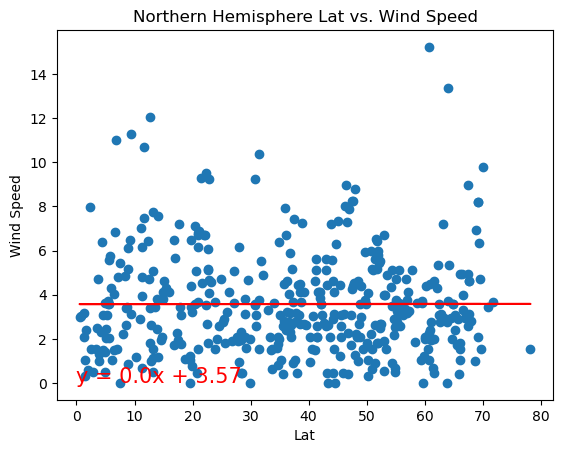

<Figure size 640x480 with 0 Axes>

In [113]:
# Northern Hemisphere
regressor('Lat', 'Wind Speed', True)
plt.savefig("output_data/Fig11.png")

r-value = 0.1281077347602815


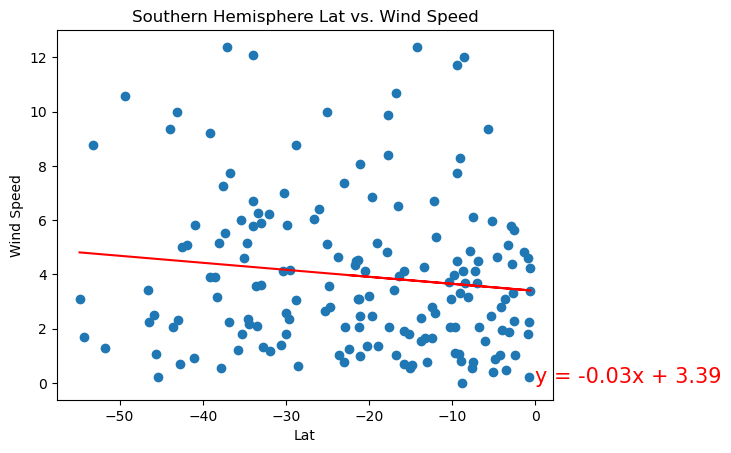

<Figure size 640x480 with 0 Axes>

In [114]:
# Southern Hemisphere
regressor('Lat', 'Wind Speed', False)
plt.savefig("output_data/Fig11.png")

**Discussion about the linear relationship:** There is no relationship between latitude and wind speed although like couldiness, there is a minimal increase in the r value observed in the Southern Hempisphere.